In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D,Conv1DTranspose,Concatenate,Input
import numpy as np
import IPython.display
import glob
from tqdm.notebook import tqdm
import librosa.display
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!mkdir "CleanData5"
!mkdir "NoisyData5"

!unzip "/content/drive/MyDrive/Noise/clean_trainset_wav.zip" -d "CleanData5"
!unzip "/content/drive/MyDrive/Noise/noisy_trainset_wav.zip" -d "NoisyData5"

Streaming output truncated to the last 5000 lines.
  inflating: NoisyData5/p267_421.wav  
  inflating: NoisyData5/p268_001.wav  
  inflating: NoisyData5/p268_002.wav  
  inflating: NoisyData5/p268_003.wav  
  inflating: NoisyData5/p268_004.wav  
  inflating: NoisyData5/p268_005.wav  
  inflating: NoisyData5/p268_006.wav  
  inflating: NoisyData5/p268_007.wav  
  inflating: NoisyData5/p268_009.wav  
  inflating: NoisyData5/p268_010.wav  
  inflating: NoisyData5/p268_011.wav  
  inflating: NoisyData5/p268_012.wav  
  inflating: NoisyData5/p268_013.wav  
  inflating: NoisyData5/p268_014.wav  
  inflating: NoisyData5/p268_015.wav  
  inflating: NoisyData5/p268_016.wav  
  inflating: NoisyData5/p268_017.wav  
  inflating: NoisyData5/p268_018.wav  
  inflating: NoisyData5/p268_019.wav  
  inflating: NoisyData5/p268_020.wav  
  inflating: NoisyData5/p268_021.wav  
  inflating: NoisyData5/p268_022.wav  
  inflating: NoisyData5/p268_024.wav  
  inflating: NoisyData5/p268_025.wav  
  inflating: 

In [4]:
clean_train_list = glob.glob('/content/CleanData5/*')
noisy_train_list = glob.glob('/content/NoisyData5/*')

In [5]:
clean_samples, _ = tf.audio.decode_wav(tf.io.read_file(clean_train_list[0]), desired_channels=1)
for audio in tqdm(clean_train_list[1:]):
  aud, _ = tf.audio.decode_wav(tf.io.read_file(audio), desired_channels=1)
  clean_samples = tf.concat([clean_samples, aud], axis=0)


noisy_samples, _ = tf.audio.decode_wav(tf.io.read_file(noisy_train_list[0]), desired_channels=1)
for audio in tqdm(noisy_train_list[1:]):
  aud, _ = tf.audio.decode_wav(tf.io.read_file(audio), desired_channels=1)
  noisy_samples = tf.concat([noisy_samples, aud], axis=0)

clean_samples, noisy_samples

  0%|          | 0/11571 [00:00<?, ?it/s]

  0%|          | 0/11571 [00:00<?, ?it/s]

(<tf.Tensor: shape=(540938091, 1), dtype=float32, numpy=
 array([[ 0.00982666],
        [ 0.01580811],
        [ 0.01367188],
        ...,
        [-0.01095581],
        [-0.01034546],
        [-0.01171875]], dtype=float32)>,
 <tf.Tensor: shape=(540938091, 1), dtype=float32, numpy=
 array([[ 0.0111084 ],
        [ 0.03872681],
        [ 0.03204346],
        ...,
        [-0.00756836],
        [-0.01141357],
        [-0.00863647]], dtype=float32)>)

In [6]:
import pickle
with open('clean_samples.pkl', 'wb') as f:
  pickle.dump(clean_samples, f)
with open('noisy_samples.pkl', 'wb') as f:
  pickle.dump(noisy_samples, f)

In [7]:
pickle_in = open('clean_samples.pkl', 'rb')
clean_samples = pickle.load(pickle_in)
clean_samples = tf.cast(clean_samples, 'float16')

pickle_in = open('noisy_samples.pkl', 'rb')
noisy_samples = pickle.load(pickle_in)
noisy_samples = tf.cast(noisy_samples, 'float16')

In [8]:
clean_train, noisy_train = [], []
sampling_size = 16000
for i in range((noisy_samples.shape[0]) // sampling_size):
  clean_train.append(clean_samples[i * sampling_size:i * sampling_size + sampling_size])
  noisy_train.append(noisy_samples[i * sampling_size:i * sampling_size + sampling_size])

noisy_train = tf.stack(noisy_train)
clean_train = tf.stack(clean_train)

clean_train, noisy_train


(<tf.Tensor: shape=(33808, 16000, 1), dtype=float16, numpy=
 array([[[ 0.00983  ],
         [ 0.01581  ],
         [ 0.01367  ],
         ...,
         [-0.0334   ],
         [-0.04196  ],
         [-0.05255  ]],
 
        [[-0.05957  ],
         [-0.06744  ],
         [-0.0758   ],
         ...,
         [-0.133    ],
         [-0.1165   ],
         [-0.0974   ]],
 
        [[-0.083    ],
         [-0.0747   ],
         [-0.0664   ],
         ...,
         [-0.003937 ],
         [-0.00403  ],
         [-0.00415  ]],
 
        ...,
 
        [[-0.0407   ],
         [-0.02954  ],
         [-0.01678  ],
         ...,
         [-0.03552  ],
         [-0.03232  ],
         [-0.03009  ]],
 
        [[-0.03073  ],
         [-0.03625  ],
         [-0.03876  ],
         ...,
         [-0.0017395],
         [-0.001892 ],
         [-0.001984 ]],
 
        [[-0.002228 ],
         [-0.00241  ],
         [-0.002533 ],
         ...,
         [-0.0821   ],
         [-0.0687   ],
         [-0.0489   ]

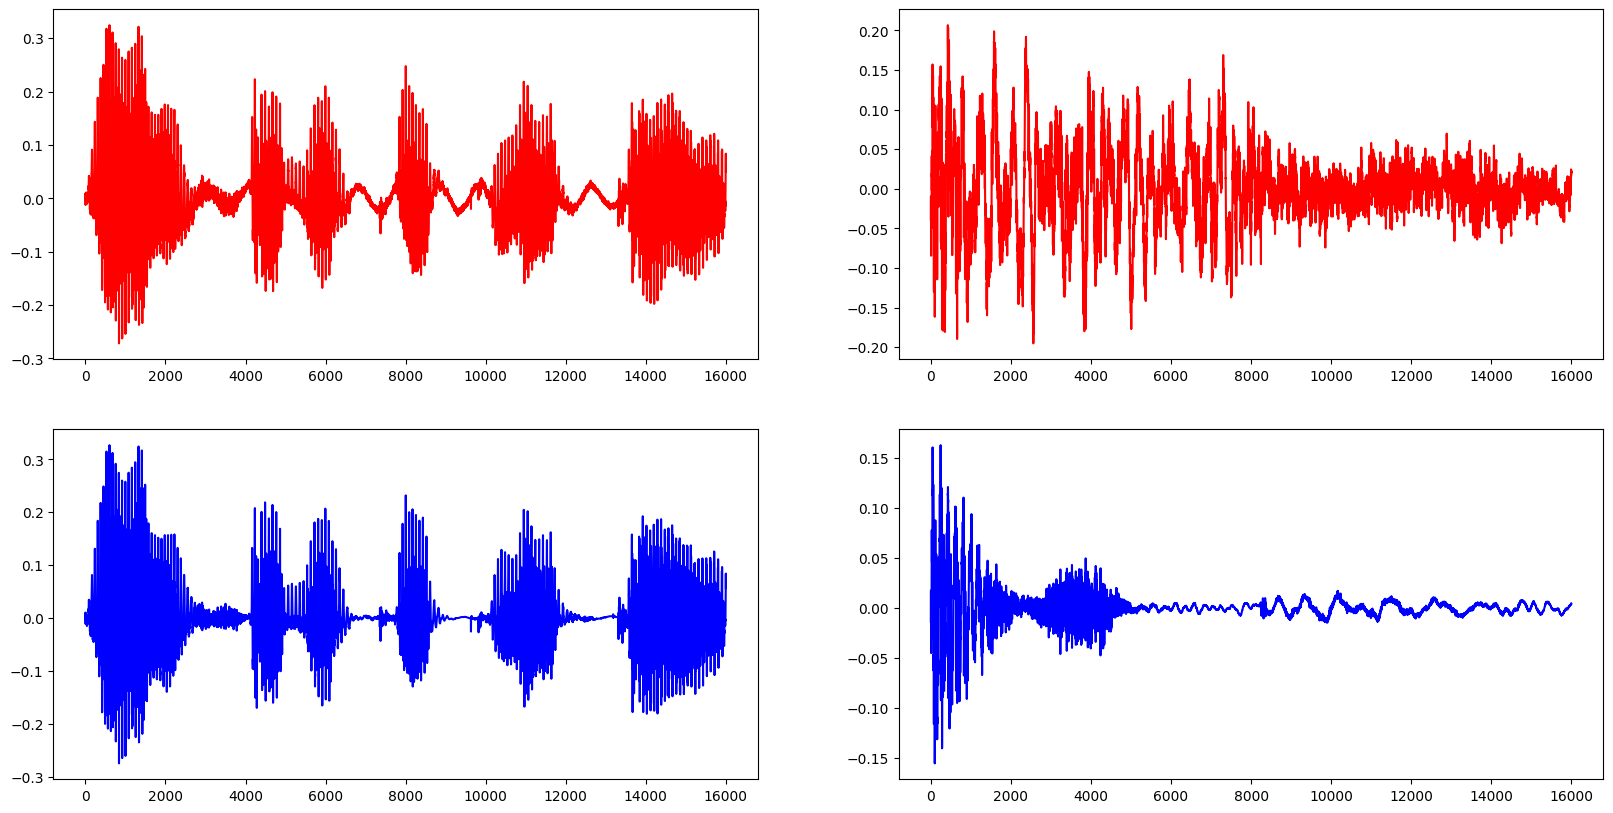

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

axes[0][0].plot(np.arange(noisy_train[10].shape[0]), noisy_train[10], color='r')
axes[1][0].plot(np.arange(clean_train[10].shape[0]), clean_train[10], color='b')

axes[0][1].plot(np.arange(noisy_train[100].shape[0]), noisy_train[100], color='r')
axes[1][1].plot(np.arange(clean_train[100].shape[0]), clean_train[100], color='b')

plt.show()

In [10]:
def input_pipeline(X, y, batch_size, shuffle_buffer, train_split=0.8):
  train_split_index = int(X.shape[0] * 0.8)
  ds = tf.data.Dataset.from_tensor_slices((X, y))
  ds = ds.shuffle(shuffle_buffer)
  train_ds, val_ds = ds.take(train_split_index), ds.skip(train_split_index)
  train_ds = train_ds.batch(batch_size)
  val_ds = val_ds.batch(batch_size)
  return train_ds.prefetch(1), val_ds.prefetch(1)

train_ds, val_ds = input_pipeline(noisy_train, clean_train, 64, 50000)
train_ds, val_ds

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 16000, 1), dtype=tf.float16, name=None), TensorSpec(shape=(None, 16000, 1), dtype=tf.float16, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 16000, 1), dtype=tf.float16, name=None), TensorSpec(shape=(None, 16000, 1), dtype=tf.float16, name=None))>)

In [11]:
from tensorflow.keras import layers
def build_model():
  inputs = layers.Input((16000, 1))

  conv1 = layers.Conv1D(2, 32, 2, padding='same', activation='relu')(inputs)
  conv2 = layers.Conv1D(4, 32, 2, padding='same', activation='relu')(conv1)
  conv3 = layers.Conv1D(8, 32, 2, padding='same', activation='relu')(conv2)
  conv4 = layers.Conv1D(16, 32, 2, padding='same', activation='relu')(conv3)
  conv5 = layers.Conv1D(32, 32, 2, padding='same', activation='relu')(conv4)

  deconv1 = layers.Conv1DTranspose(32, 32, 1, padding='same')(conv5)
  concat = layers.Concatenate()([conv5, deconv1])
  deconv2 = layers.Conv1DTranspose(16, 32, 2, padding='same')(concat)
  concat = layers.Concatenate()([conv4, deconv2])
  deconv3 = layers.Conv1DTranspose(8, 32, 2, padding='same')(concat)
  concat = layers.Concatenate()([conv3, deconv3])
  deconv4 = layers.Conv1DTranspose(4, 32, 2, padding='same')(concat)
  concat = layers.Concatenate()([conv2, deconv4])
  deconv5 = layers.Conv1DTranspose(2, 32, 2, padding='same')(concat)
  concat = layers.Concatenate()([conv1, deconv5])
  deconv6 = layers.Conv1DTranspose(1, 32, 2, padding='same')(concat)
  concat = layers.Concatenate()([inputs, deconv6])
  deconv6 = layers.Conv1DTranspose(1, 32, 1, padding='same', activation='linear')(concat)



  model = tf.keras.Model(inputs=[inputs], outputs=[deconv6], name='auto_encoders_for_noise_removal')

  return model

model = build_model()
print(model.summary())

Model: "auto_encoders_for_noise_removal"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 16000, 1)       │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 8000, 2)        │             66 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 4000, 4)        │            260 │ conv1d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 2000, 8)        │          1,032 │ conv1d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 1000, 16)       │          4,112 │ conv1d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_4 (Conv1D)         │ (None, 500, 32)        │         16,416 │ conv1d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_transpose          │ (None, 500, 32)        │         32,800 │ conv1d_4[0][0]         │
│ (Conv1DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 500, 64)        │              0 │ conv1d_4[0][0],        │
│                           │                        │                │ conv1d_transpose[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_transpose_1        │ (None, 1000, 16)       │         32,784 │ concatenate[0][0]      │
│ (Conv1DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 1000, 32)       │              0 │ conv1d_3[0][0],        │
│ (Concatenate)             │                        │                │ conv1d_transpose_1[0]… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_transpose_2        │ (None, 2000, 8)        │          8,200 │ concatenate_1[0][0]    │
│ (Conv1DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 2000, 16)       │              0 │ conv1d_2[0][0],        │
│ (Concatenate)             │                        │                │ conv1d_transpose_2[0]… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_transpose_3        │ (None, 4000, 4)        │          2,052 │ concatenate_2[0][0]    │
│ (Conv1DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_3             │ (None, 4000, 8)        │              0 │ conv1d_1[0][0],        │
│ (Concatenate)             │                        │                │ conv1d_transpose_3[0]… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_transpose_4        │ (None, 8000, 2)        │            514 │ concatenate_3[0][0]    │
│ (Conv1DTranspose)         │                        │                │                        │
├──────────────────────

 Total params: 98,430 (384.49 KB)

 Trainable params: 98,430 (384.49 KB)

 Non-trainable params: 0 (0.00 B)

None


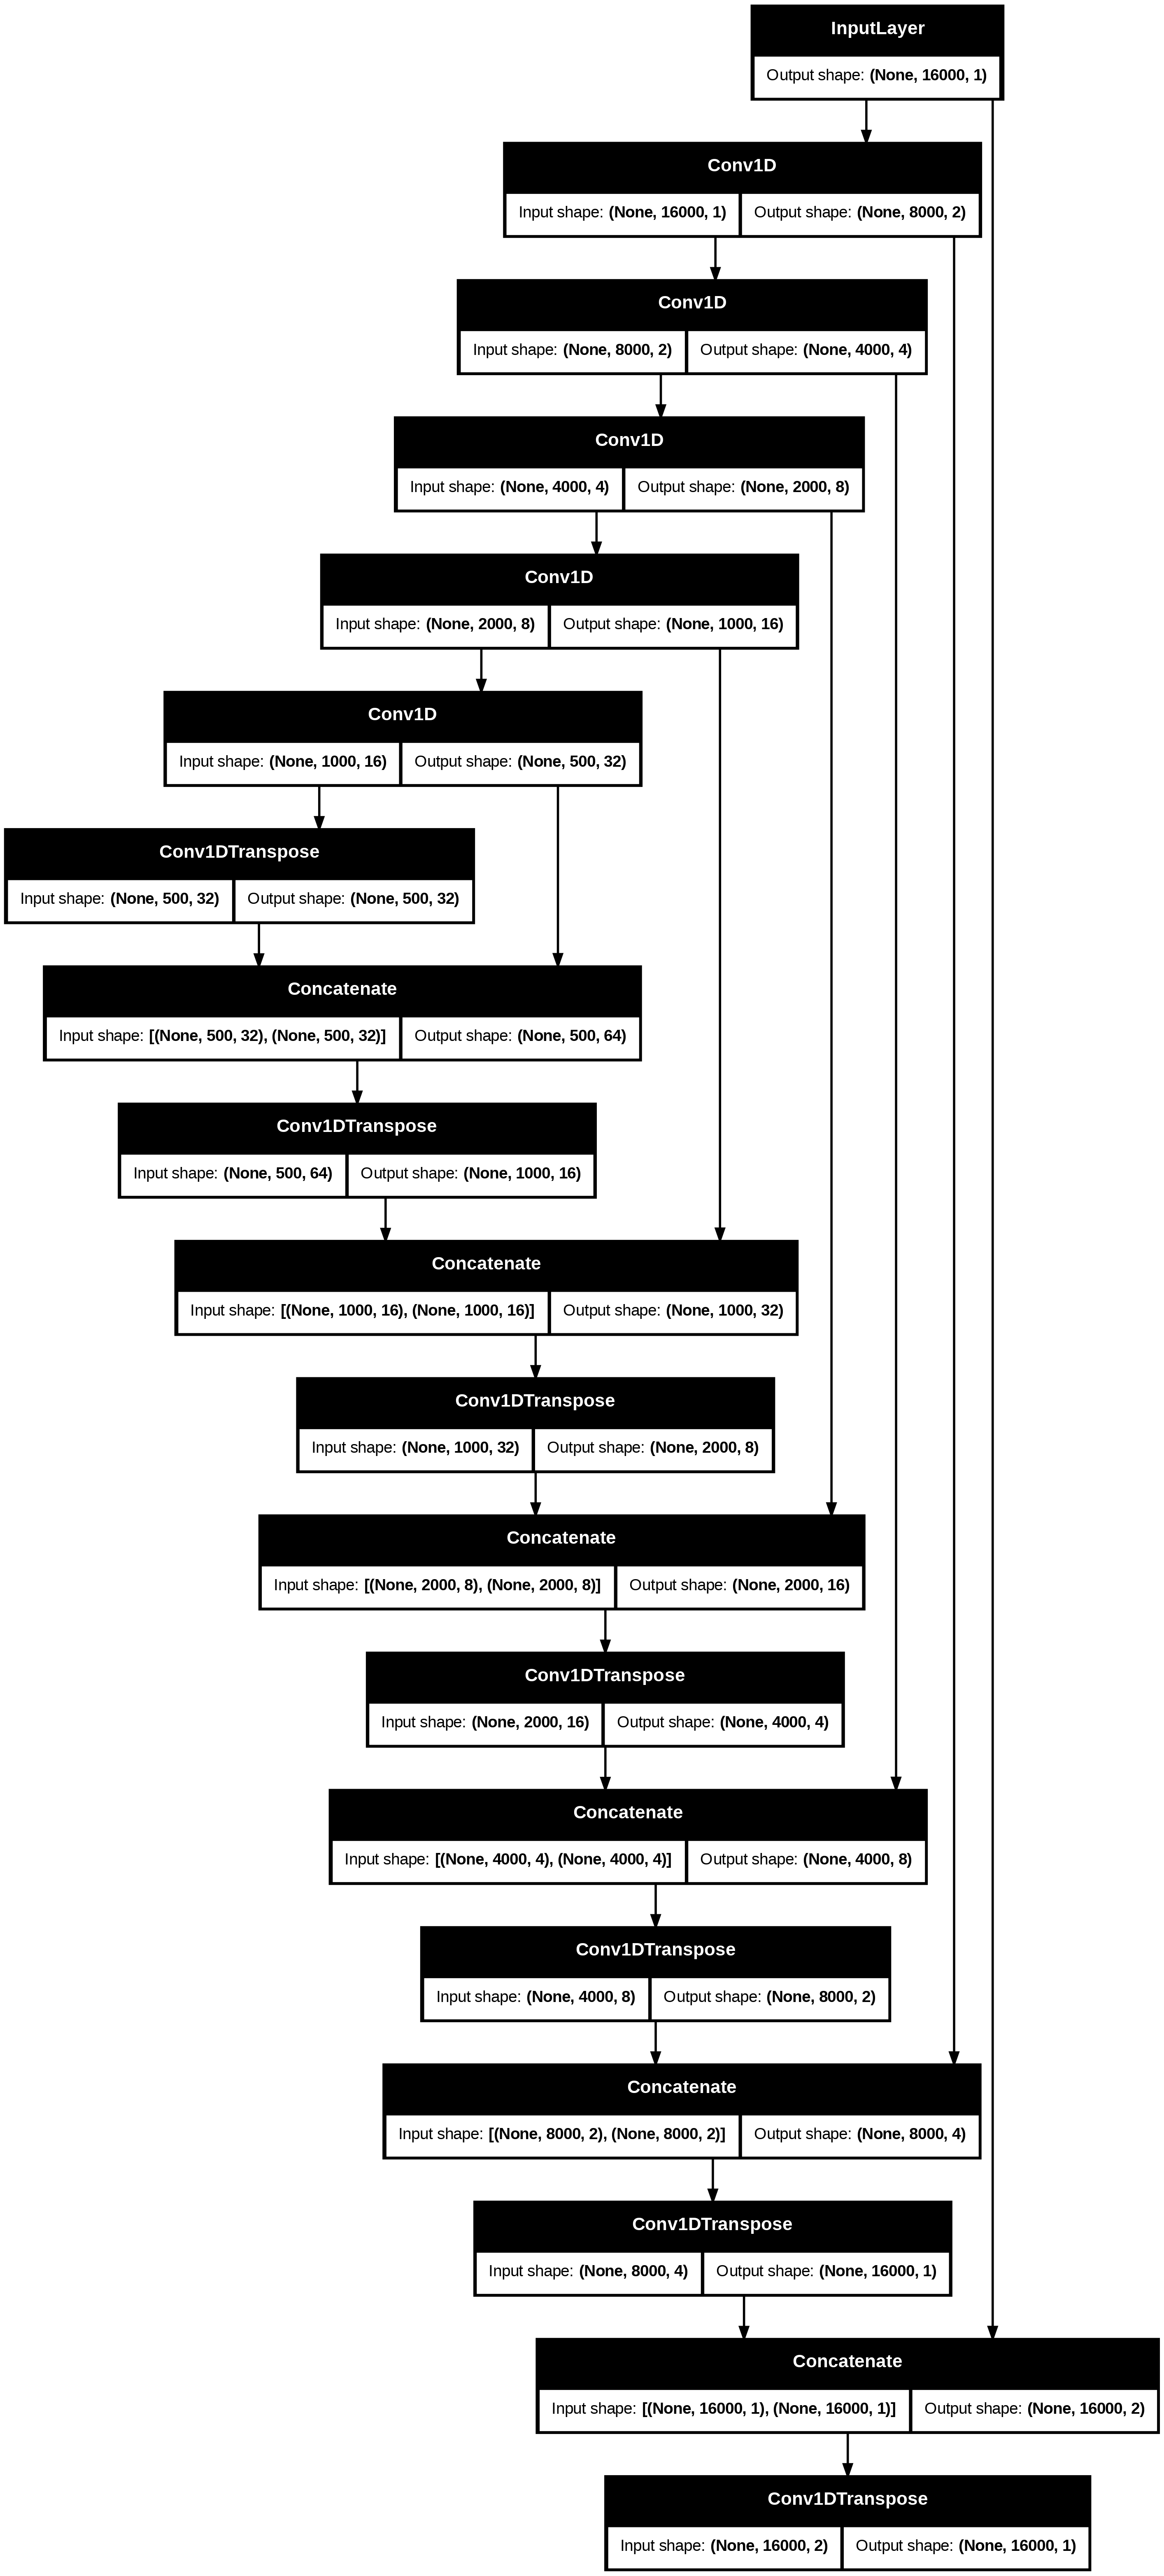

In [12]:
tf.keras.utils.plot_model(model,show_shapes=True,show_layer_names=False)

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.002),loss=tf.keras.losses.MeanAbsoluteError())
history = model.fit(train_ds,epochs=20)

Epoch 1/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 27s 33ms/step - loss: 0.0256
Epoch 2/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 0.0150
Epoch 3/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - loss: 0.0138
Epoch 4/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 0.0133
Epoch 5/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 0.0131
Epoch 6/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 0.0129
Epoch 7/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - loss: 0.0131
Epoch 8/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - loss: 0.0126
Epoch 9/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 0.0125
Epoch 10/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - loss: 0.0123
Epoch 11/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.0122
Epoch 12/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 0.0122
Epoch 13/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.0121
Epoch 14/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 0.0122
Epoch 15/20
423/423 ━━━━━━━━━━

In [14]:
from IPython.display import Audio
Audio(np.squeeze(noisy_train[22].numpy()),rate=16000)

In [15]:
Audio(tf.squeeze(model.predict(tf.expand_dims(tf.expand_dims(noisy_train[22],-1),0))),rate=16000)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step


In [16]:
model.evaluate(val_ds)

106/106 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0119


0.011777191422879696

In [17]:
model.save('NoiseSuppressionModel.h5')

In [18]:
def get_audio(path):
  audio,_ = tf.audio.decode_wav(tf.io.read_file(path),1)
  return audio

In [19]:
def inference_preprocess(path):
  audio = get_audio(path)
  audio_len = audio.shape[0]
  batches = []
  for i in range(0,audio_len-sampling_size,sampling_size):
    batches.append(audio[i:i+sampling_size])

  batches.append(audio[-sampling_size:])
  diff = audio_len - (i + sampling_size)
  return tf.stack(batches), diff

In [20]:
def predict(path):
  test_data,diff = inference_preprocess(path)
  predictions = model.predict(test_data)
  final_op = tf.reshape(predictions[:-1],((predictions.shape[0]-1)*predictions.shape[1],1))
  final_op = tf.concat((final_op,predictions[-1][-diff:]),axis=0)
  return final_op

In [21]:
Audio(np.squeeze(get_audio(noisy_train_list[4]).numpy(),-1),rate=16000)

In [34]:
#Audio(tf.squeeze(predict(noisy_train_list[4])),rate=16000)

In [35]:
#%%timeit
#tf.squeeze(predict(noisy_train_list[3]))

In [25]:
lite_model = tf.lite.TFLiteConverter.from_keras_model(model)
lite_model.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model_quant = lite_model.convert()

Saved artifact at '/tmp/tmpgbzo3j8e'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 16000, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 16000, 1), dtype=tf.float32, name=None)
Captures:
  134760237143792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134760236440864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134760237144496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134760236445968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134760236448432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134760236684160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134760236686096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134760236680112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134760236688912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134760236685040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1347602366

In [26]:
with open('TFLiteModel.tflite','wb') as f:
  f.write(tflite_model_quant)

In [27]:
interpreter = tf.lite.Interpreter(model_path='/content/TFLiteModel.tflite')
interpreter.allocate_tensors()

In [28]:
def predict_tflite(path):
  test_audio,diff = inference_preprocess(path)
  input_index = interpreter.get_input_details()[0]["index"]
  output_index = interpreter.get_output_details()[0]["index"]

  preds = []
  for i in test_audio:
    interpreter.set_tensor(input_index, tf.expand_dims(i,0))
    interpreter.invoke()
    predictions = interpreter.get_tensor(output_index)
    preds.append(predictions)

  predictions = tf.squeeze(tf.stack(preds,axis=1))
  final_op = tf.reshape(predictions[:-1],((predictions.shape[0]-1)*predictions.shape[1],1))
  final_op = tf.concat((tf.squeeze(final_op),predictions[-1][-diff:]),axis=0)
  return final_op

In [29]:
Audio(np.squeeze(get_audio(noisy_train_list[5]).numpy(),-1),rate=16000)

In [30]:
Audio(np.squeeze(get_audio(clean_train_list[5]).numpy(),-1),rate=16000)

In [31]:
Audio(predict_tflite(noisy_train_list[5]),rate=16000)

In [32]:
%%timeit
predict_tflite(noisy_train_list[5])

440 ms ± 17.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


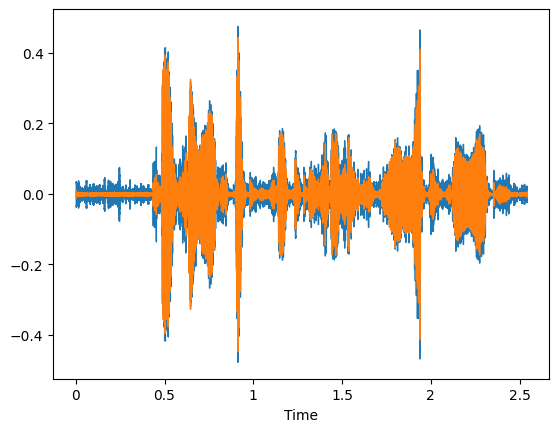

In [33]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
librosa.display.waveshow(np.squeeze(get_audio(noisy_train_list[4]).numpy(),-1))
librosa.display.waveshow(predict_tflite(noisy_train_list[4]).numpy())